In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
sns.set()

# Load Data

In [88]:
def load_data(data_location):
    return pd.read_csv(data_location)

In [89]:
data_location = "data/denver_data.csv"
df = load_data(data_location)

# Normalize Data

In [90]:
def min_max_normalization(df):
    return (df - df.min()) / (df.max() - df.min())

In [91]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
y_df = df['weather_description_Denver']
X_df = df.drop('weather_description_Denver', axis=1)

le = LabelEncoder()
le.fit(y_df)
y_df = le.transform(y_df)
# y_df = pd.DataFrame(to_categorical(y_df, len(np.unique(y_df, return_counts=True)[0])))
pd.DataFrame(y_df).values

array([[11],
       [ 0],
       [ 0],
       ...,
       [23],
       [ 5],
       [23]])

In [92]:
normalized_X_df = min_max_normalization(X_df)
normalized_X_df.describe()

,humidity_Denver,pressure_Denver,temperature_Denver,wind_direction_Denver,wind_speed_Denver
count,43209.000000,43209.000000,43209.000000,43209.000000,43209.000000
mean,0.505507,0.733067,0.532536,0.515345,0.112855
std,0.251536,0.145425,0.162750,0.289128,0.097900
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294737,0.740484,0.415001,0.277778,0.045455
50%,0.494737,0.761246,0.535051,0.558333,0.090909
75%,0.715789,0.778547,0.651936,0.741667,0.136364
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualize Data

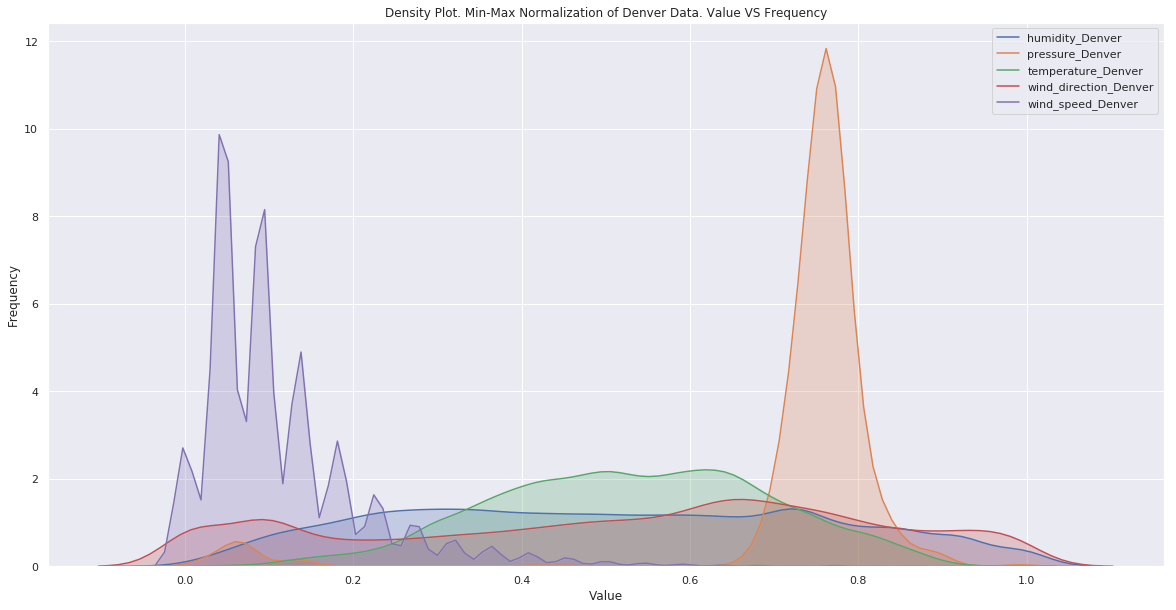

In [93]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Density Plot. Min-Max Normalization of Denver Data. Value VS Frequency")
for col in normalized_X_df.columns:
    sns.kdeplot(normalized_X_df[col], shade=True, ax=ax)

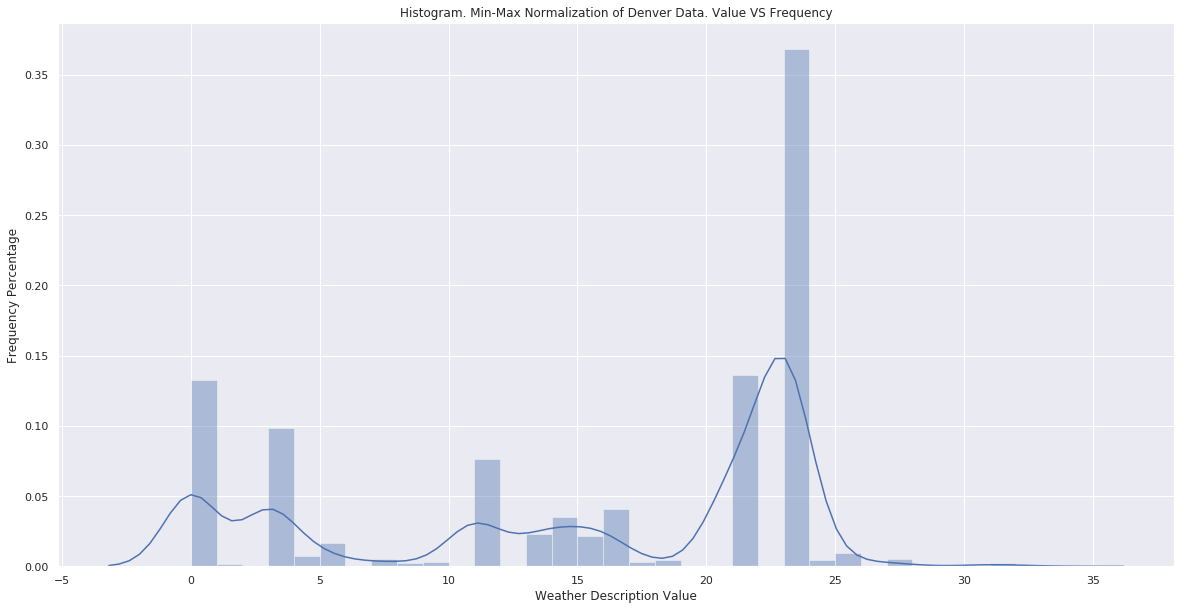

In [99]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("Weather Description Value")
plt.ylabel("Frequency Percentage")
plt.title("Histogram. Min-Max Normalization of Denver Data. Value VS Frequency")
sns.distplot(y_df, ax=ax)
# Clearly the data is very imbalanced. Not good....

# Split Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(normalized_X_df, y_df, test_size=0.2)

In [48]:
# Input Training Data for Model
x_train.head()

,humidity_Denver,pressure_Denver,temperature_Denver,wind_direction_Denver,wind_speed_Denver
40509,0.863158,0.775087,0.576810,0.805556,0.090909
32828,0.484211,0.726644,0.574538,0.758333,0.090909
20564,0.778947,0.799308,0.491733,0.841667,0.045455
20862,0.684211,0.761246,0.591699,0.855556,0.090909
31935,0.600000,0.754325,0.653148,0.527778,0.045455


In [53]:
# Output Training Data for Model
pd.DataFrame(y_train).head()

,weather_description_Denver
40509,mist
32828,sky is clear
20564,light rain
20862,overcast clouds
31935,sky is clear
